# JUICE RPWI HF HK: QL -- 2023/10/17

In [1]:
import sys

# CDF and Directory setting: set by User

In [2]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
# from spacepy import pycdf

import os
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_0-dist/lib"

# *** Library ***
sys.path.append('./lib/')
import juice_cdf_lib as juice_cdf
import juice_hk_lib as juice_hk
# import juice_math_lib as juice_math

# Setting and Read CDF file: set by User

In [3]:
# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/JUICE_python/ql/'                      # Plot dump folder
#data_dir = '/Users/user/0-python/JUICE_data/'                           # CDF data folder
base_dir = '/Users/user/OneDrive-Univ/data/data-JUICE/datasets/'

date='20230712'

# (1) read CDF files

In [4]:
data_hf, err_hf = juice_hk.juice_readhk(
    date, 'LWYHK00032', base_dir=base_dir)
data_dpu, err_dpu = juice_hk.juice_readhk(
    date, 'LWYHK00064', base_dir=base_dir)
data_lvps, err_lvps = juice_hk.juice_readhk(
    date, 'LWYHK00080', base_dir=base_dir)

if err_hf == 0: 
    hk_hf = juice_hk.juice_gethk_hf(data_hf)
if err_dpu == 0:
    hk_dpu = juice_hk.juice_gethk_dpu(data_dpu)
if err_lvps == 0:
    hk_lvps = juice_hk.juice_gethk_lvps(data_lvps)


# (2) Plot HK values

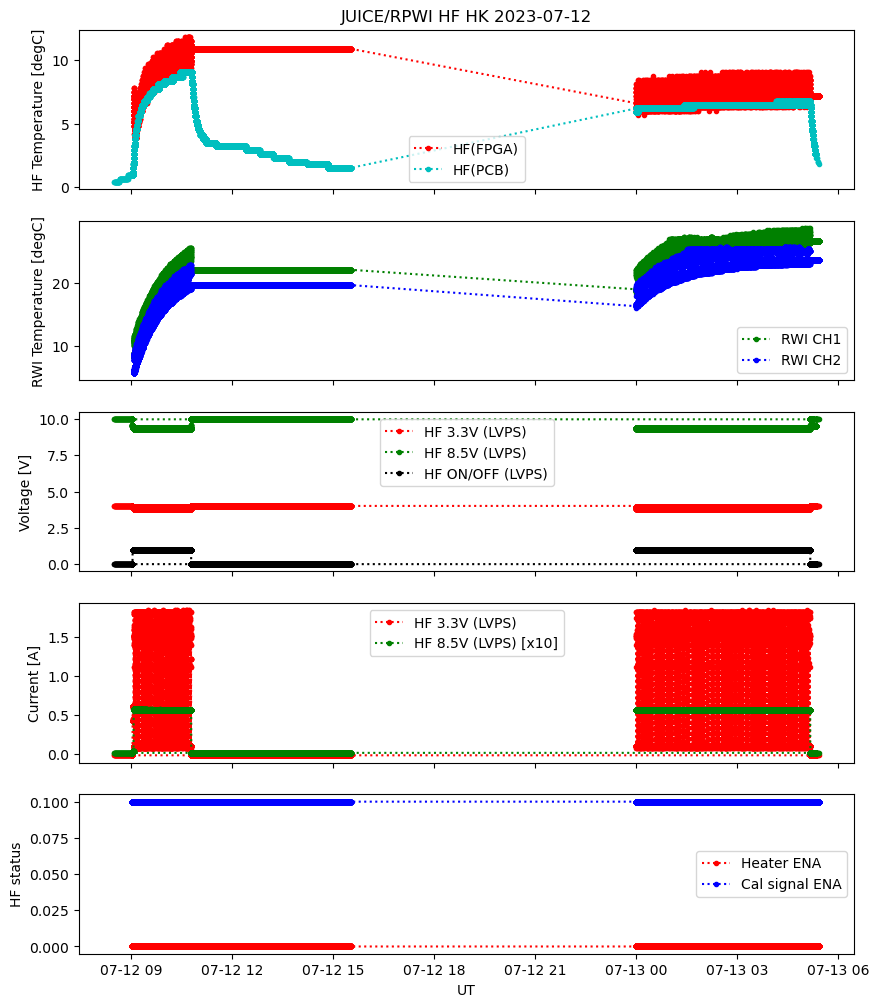

In [5]:
import matplotlib.pyplot as plt
import numpy as np

title_label = 'JUICE/RPWI HF HK ' + date[0:4] + '-' + date[4:6] + '-' + date[6:8]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(
    5, figsize=(10.0, 12.0), sharex=True)

if err_hf == 0:
    temp_lim = [-150.0, 100.0]
    temp_rwi_ch1 = np.where((hk_hf.temp_rwi_ch1 < temp_lim[0]) |
                          (hk_hf.temp_rwi_ch1 > temp_lim[1]), np.nan, hk_hf.temp_rwi_ch1)
    temp_rwi_ch2 = np.where((hk_hf.temp_rwi_ch2 < temp_lim[0]) |
                          (hk_hf.temp_rwi_ch2 > temp_lim[1]), np.nan, hk_hf.temp_rwi_ch2)
    temp_hf_fpga = np.where((hk_hf.temp_hf_fpga < temp_lim[0]) |
                            (hk_hf.temp_hf_fpga > temp_lim[1]), np.nan, hk_hf.temp_hf_fpga)

#-----------------------------------------------------------------
if err_hf == 0:
    ax1.plot(hk_hf.epoch, temp_hf_fpga, '.:r', label='HF(FPGA)')
if err_dpu == 0:
    ax1.plot(hk_dpu.epoch, hk_dpu.hf_temp, '.:c', label='HF(PCB)')

ax1.set_ylabel('HF Temperature [degC]')
ax1.legend()
ax1.set_title(title_label)

#-----------------------------------------------------------------
if err_hf == 0:
    ax2.plot(hk_hf.epoch, temp_rwi_ch1, '.:g', label='RWI CH1')
    ax2.plot(hk_hf.epoch, temp_rwi_ch2, '.:b', label='RWI CH2')

ax2.set_ylabel('RWI Temperature [degC]')
ax2.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax3.plot(hk_lvps.epoch, hk_lvps.vol_hf_33, '.:r', label='HF 3.3V (LVPS)')
    ax3.plot(hk_lvps.epoch, hk_lvps.vol_hf_85, '.:g', label='HF 8.5V (LVPS)')
    ax3.plot(hk_lvps.epoch, hk_lvps.hf_on_off, '.:k', label='HF ON/OFF (LVPS)')
ax3.set_ylabel('Voltage [V]')
ax3.legend()

#-----------------------------------------------------------------
if err_lvps == 0:
    ax4.plot(hk_lvps.epoch, hk_lvps.cur_hf_33, '.:r', label='HF 3.3V (LVPS)')
    ax4.plot(hk_lvps.epoch, hk_lvps.cur_hf_85*10, '.:g', label='HF 8.5V (LVPS) [x10]')

ax4.set_ylabel('Current [A]')
ax4.legend()

#-----------------------------------------------------------------
if err_hf == 0:
    ax5.plot(hk_hf.epoch, hk_hf.heater_ena, '.:r', label='Heater ENA')
    ax5.plot(hk_hf.epoch, hk_hf.calsig_ena+0.1, '.:b', label='Cal signal ENA')

ax5.set_ylabel('HF status')
ax5.legend()
ax5.set_xlabel('UT')

#-----------------------------------------------------------------
png_fname = work_dir+'RPWI_HF_HK_'+date+'.png'
# fig.savefig(png_fname)

# print(hk_lvps.cur_hf_33[300:500])
# print(hk_lvps.cur_hf_85[300:500])